# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Data Dictionary

Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Variable : Description

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : (Target) Loan approved (Y/N)



Test file: CSV containing the customer information for whom loan eligibility is to be predicted


Variable : Description

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines

Property_Area : Urban/ Semi Urban/ Rural

# Importing Essentials

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,nan,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,nan,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Looking for Relations

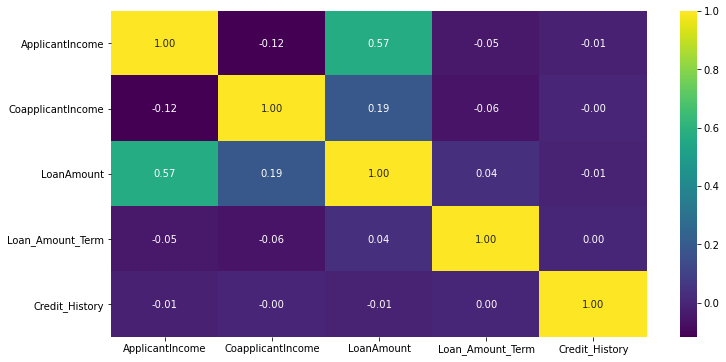

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), cmap='viridis', annot=True, fmt='.2f')

In [8]:
train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})

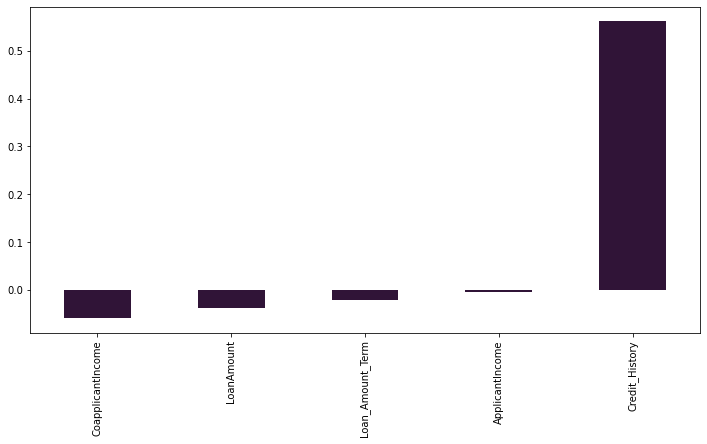

In [9]:
plt.figure(figsize = (12,6))
train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'twilight_shifted')

# Exploratory Data Analysis

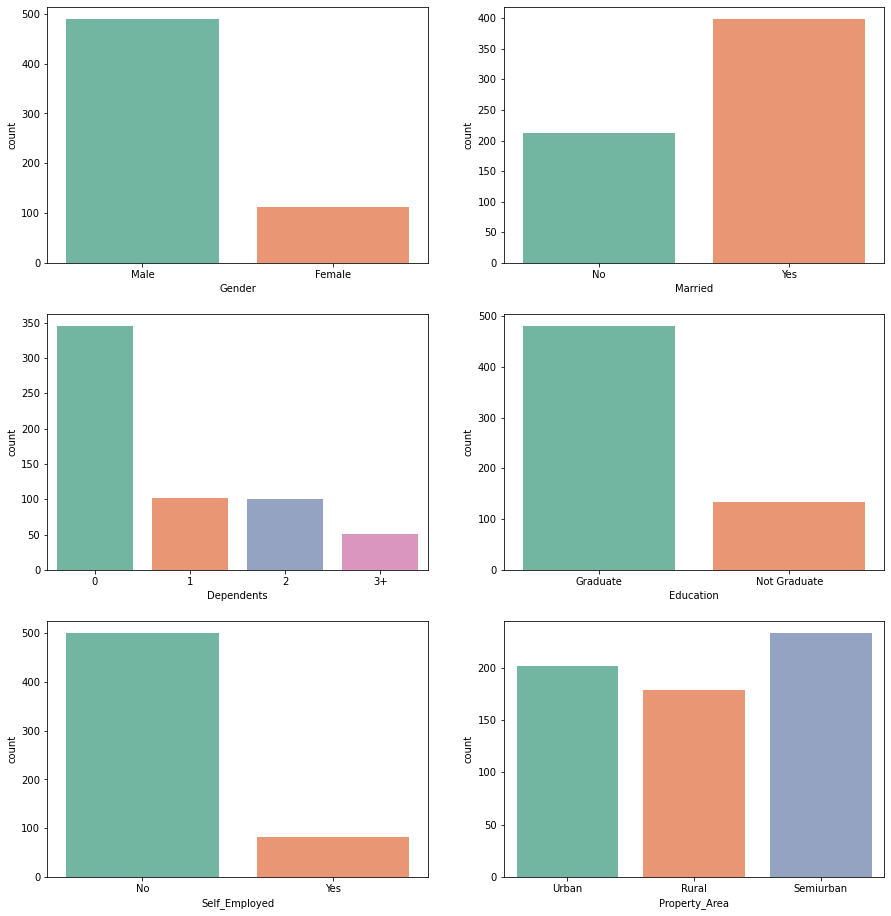

In [10]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(train['Gender'], ax=ax[0,0], palette='Set2')
_=sns.countplot(train['Married'], ax=ax[0,1], palette='Set2')
_=sns.countplot(train['Dependents'], ax=ax[1,0], palette='Set2')
_=sns.countplot(train['Education'], ax=ax[1,1], palette='Set2')
_=sns.countplot(train['Self_Employed'], ax=ax[2,0], palette='Set2')
_=sns.countplot(train['Property_Area'], ax=ax[2,1], palette='Set2')

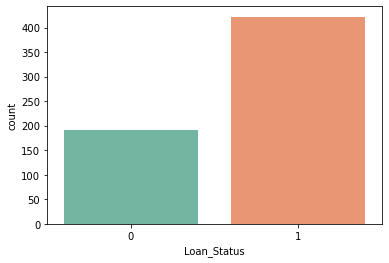

In [11]:
sns.countplot(train['Loan_Status'], palette='Set2')

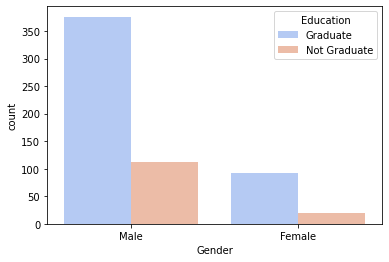

In [12]:
sns.countplot('Gender', hue = 'Education', data = train, palette = 'coolwarm')

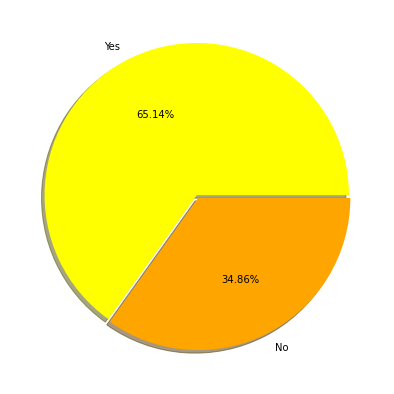

In [13]:
size = train['Married'].value_counts()
labels = ['Yes', 'No']
color = ['yellow', 'orange']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

In [14]:
gender = train[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.70
Male,149.27


In [15]:
Education = train[['Education', 'LoanAmount']].groupby("Education").mean()
Education = pd.DataFrame(Education)
Education

,LoanAmount
Education,
Graduate,154.06
Not Graduate,118.41


# Looking for null values

In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Since Loan_ID is needed for sample_submission hence I am replacing 'LP00' with empty string.

In [18]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

## Counting the values for categorical columns

In [19]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [23]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

# Dealing with the missing data

In [24]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [25]:
test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

# Changing the datatypes of certain columns

In [27]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [28]:
# Removing the '+' sign from Dependents column
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')

In [29]:
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')

# Imputing categorical columns

In [30]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [31]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})

# Creating dummy variables for Property column

In [32]:
property_area = pd.get_dummies(train['Property_Area'], prefix='Property_Area')
train = pd.concat([train, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(test['Property_Area'], prefix='Property_Area')
test = pd.concat([test, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)

# Scaling the data

In [33]:
scaler = StandardScaler()

train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))

In [34]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [35]:
for col in numerical_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

# Splitting the data

In [36]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_test = test

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Building Models

In [38]:
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_val, y_train, y_val)

100%|██████████| 30/30 [00:01<00:00, 20.41it/s]


In [39]:
model.sort_values('Accuracy', ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.78,0.70,0.70,0.76,0.05
NuSVC,0.78,0.70,0.70,0.75,0.03
QuadraticDiscriminantAnalysis,0.78,0.71,0.71,0.76,0.02
GaussianNB,0.78,0.71,0.71,0.76,0.02
KNeighborsClassifier,0.78,0.71,0.71,0.76,0.03
LinearDiscriminantAnalysis,0.78,0.70,0.70,0.76,0.02
RidgeClassifierCV,0.78,0.70,0.70,0.76,0.02
RidgeClassifier,0.78,0.70,0.70,0.76,0.02
NearestCentroid,0.78,0.70,0.70,0.76,0.02


In [40]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['AdaBoostClassifier ', AdaBoostClassifier()],
        ['ExtraTreesClassifier ', ExtraTreesClassifier()],
        ['XGBClassifier ', XGBClassifier()],
        ['GradientBoostingClassifier ', GradientBoostingClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()],
         ['LGBMClassifier ', LGBMClassifier()]]

In [41]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))

LogisticRegression  0.7837837837837838
DecisionTreeClassifier  0.6918918918918919
RandomForestClassifier  0.7783783783783784
AdaBoostClassifier  0.772972972972973
ExtraTreesClassifier  0.7945945945945946
XGBClassifier  0.7567567567567568
GradientBoostingClassifier  0.7297297297297297
KNeighborsClassifier  0.6648648648648648
SVC  0.7837837837837838
LGBMClassifier  0.745945945945946


Here i am selecting LogisticRegresssion, SVC, AdaBoostClassifier, RandomForestClassifier and SGDClassifier for Hyperparameter Tuning based the accuracy scores

# Hyperparameter Tuning

In [42]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'AdaBoostClassifier' : {
        'model' : AdaBoostClassifier(),
        'param' : {
            'n_estimators' : [100, 300, 500, 700, 1000, 2100],
            'learning_rate' : [0.1, 0.3, 0.5, 0.7]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'SGDClassifier' : {
        'model' : SGDClassifier(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'max_iter': [1000, 1100, 1500, 2100, 2800, 3000],
            'learning_rate' : ['optimal']
        }
    }
}

In [43]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [44]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.82,"LogisticRegression(C=0.9, max_iter=1500, penal..."
1,SVC,0.82,"SVC(C=0.9, degree=5, kernel='linear')"
3,RandomForestClassifier,0.82,"(DecisionTreeClassifier(max_depth=3, max_featu..."
2,AdaBoostClassifier,0.81,"(DecisionTreeClassifier(max_depth=1, random_st..."
4,SGDClassifier,0.80,SGDClassifier(penalty='l1')


LogisticRegression is giving the the best accuracy

In [45]:
final['estimator'].iloc[0]

LogisticRegression(C=0.9, max_iter=1500, penalty='l1', solver='liblinear')

In [46]:
# Using the best parameters of LogisticRegression for building the final model

classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)

In [47]:
# Predicting the test data

pred = classifier.predict(X_test)

# Making the final submission

In [48]:
test_df = pd.read_csv('test_lAUu6dG.csv')
submission = pd.read_csv('sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [49]:
submission['Loan_Status'] = pred
submission.to_csv('sample_submission.csv', index=False)

In [50]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [51]:
submission.to_csv('sample_submission.csv', index=False)

### Test Score: 0.77